<a href="https://colab.research.google.com/github/guifrribeiro/igti_ml/blob/master/TrabalhoPraticoModulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Este tutorial treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas. Tudo bem se você não entender todos os detalhes; este é um visão geral de um programa do TensorFlow com detalhes explicados enquanto progredimos.

# O guia usa tf.keras, uma API alto-nível para construir e treinar modelos no TensorFlow.

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [20]:
# Importe a base de dados Fashion MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
# Cada imagem é mapeada com um só label. Já que o nome das classes não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
# Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

train_images.shape

(60000, 28, 28)

In [23]:
# Do mesmo modo, existem 60000 labels no conjunto de treinamento:

len(train_labels)

60000

In [24]:
# Cada label é um inteiro entre 0 e 9:

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
# Existem 10000 imagens no conjnto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

test_images.shape

(10000, 28, 28)

In [26]:
# E um conjunto de teste contendo 10000 labels das imagens :

len(test_labels)

10000

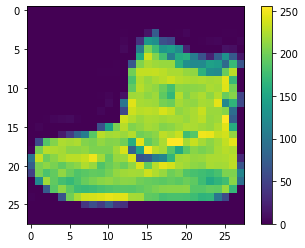

In [27]:
#PRÉ-PROCESSE OS DADOS:

# Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
# Escalaremos esses valores no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o conjunto de treinamento e o conjunto de teste podem ser pré-processados do mesmo modo:

train_images = train_images / 255.0

test_images = test_images / 255.0

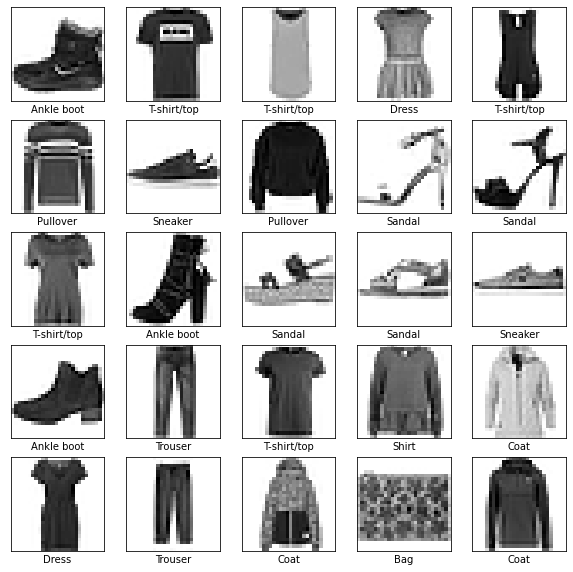

In [29]:
# Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do conjunto de treinamento e mostrar o nome das classes de cada imagem abaixo.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [30]:
# CONSTRUINDO O MODELO

# MONTAR AS CAMADAS

# O principal bloco de construção da rede neural é a camada (layer). As camadas (layers) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

# Muito do deep learning consiste encadear simples camadas. Muitas camadas, como tf.keras.layers.Dense, tem paramêtros que são aprendidos durante o treinamento.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [31]:
# COMPILE O MODELO

# Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação:

# Função Loss —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.
# Optimizer —Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
# Métricas —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# TREINE O MODELO
# Treinar a rede neural requer os seguintes passos:

# Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays train_images e train_labels.
# O modelo aprende como associar as imagens as labels.
# Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array test_images. Verificamos se as previsões combinaram com as labels do array test_labels.
# Para começar a treinar, chame o método model.fit— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4983 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3778 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2968 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2696 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [33]:
# AVALIE A ACURÁCIA

# Depois, compare como o modelo performou com o conjunto de teste:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3462 - accuracy: 0.8801

Test accuracy: 0.8801000118255615


In [34]:
# FAÇA PREDIÇÕES

# Com o modelo treinado, o usaremos para predições de algumas imagens.

predictions = model.predict(test_images)

In [35]:
# Aqui, o modelo previu que a label de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

predictions[0]

array([2.8489526e-06, 5.9784471e-09, 3.5789258e-06, 1.0347730e-09,
       9.1078052e-09, 1.3331302e-03, 4.9162452e-07, 4.5028599e-03,
       1.4698937e-08, 9.9415708e-01], dtype=float32)

In [36]:
# A predição é um array de 10 números. Eles representam um a confiança do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada label tem um maior valor de confiança:

np.argmax(predictions[0])

9

In [37]:
# Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou class_names[9]. Examinando a label do teste, vemos que essa classificação é correta:

test_labels[0]

9

In [38]:
# Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

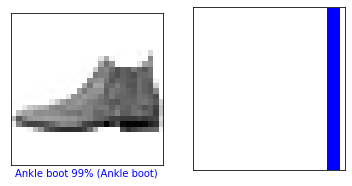

In [39]:
# Vamos olhar a previsão imagem na posição 0, do array de predição.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

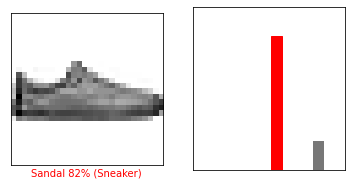

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

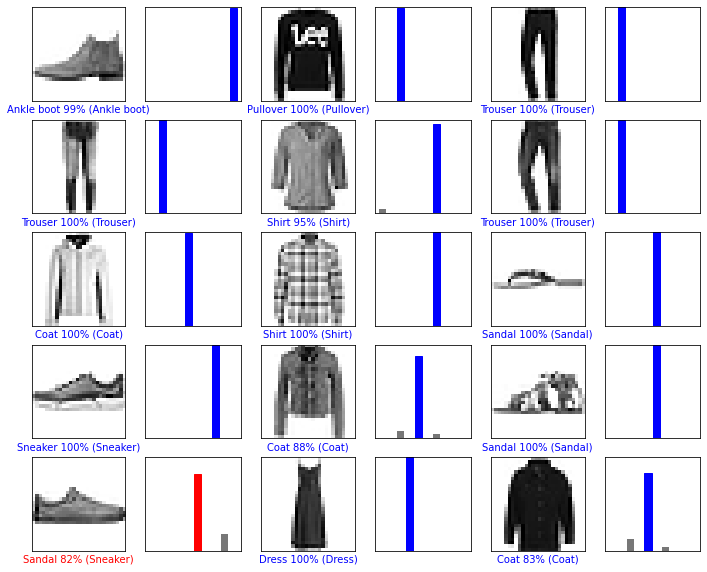

In [41]:
# Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estão confiante.

# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [42]:
# Finamente, use o modelo treinado para fazer a predição de uma única imagem.

# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [43]:
# Modelos tf.keras são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
# Agora prediremos a label correta para essa imagem:

predictions_single = model.predict(img)

print(predictions_single)

[[4.6339187e-06 3.7323744e-10 5.2332903e-06 5.9168753e-10 2.3782272e-06
  4.8837188e-04 9.0821345e-07 1.1602338e-02 3.8623648e-06 9.8789227e-01]]


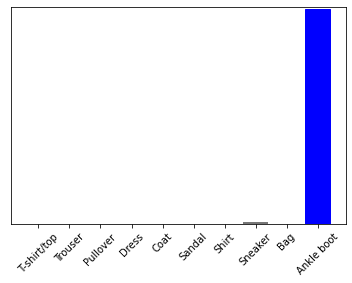

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
# model.predict retorna a lista de listas — uma lista para cada imagem em um batch de dados. Pegue a predição de nossa (única) imagem no batch:

np.argmax(predictions_single[0])

9

In [ ]:
# E, como antes, o modelo previu a label como 9.

